In [2]:
#importing modules
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
#loading Dataset
df=pd.read_csv(r'C:\Users\nishtha\Desktop\comments.csv')

In [4]:
df.shape

(159571, 8)

In [6]:
df.head(10)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


# Data Analysis and Visualisation

In [7]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.isnull().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [9]:
rowSums = df.iloc[:,2:].sum(axis=1)
clean_comments_count = (rowSums==0).sum(axis=0)

print("Total number of comments = ",len(df))
print("Number of clean comments = ",clean_comments_count)
print("Number of comments with labels =",(len(df)-clean_comments_count))

Total number of comments =  159571
Number of clean comments =  143346
Number of comments with labels = 16225


In [10]:
df['text length'] = df['comment_text'].apply(len)
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


C:\Users\nishtha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


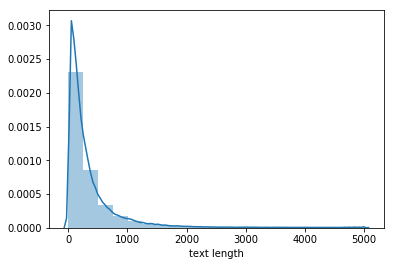

In [11]:
import seaborn as sns
sns.distplot(a=df['text length'],bins=20)

In [12]:
#counting total number of comments of different categories
categories = list(df.columns.values)
categories = categories[2:8]
print(categories)
counts = []
for category in categories:
    counts.append((category, df[category].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number of comments'])
df_stats

['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']


,category,number of comments
0,toxic,15294
1,severe_toxic,1595
2,obscene,8449
3,threat,478
4,insult,7877
5,identity_hate,1405


Text(0, 0.5, 'count')

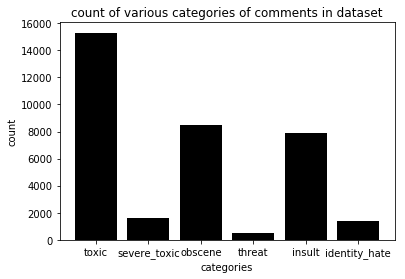

In [13]:
#ax= sns.barplot(categories, data_raw.iloc[:,2:].sum().values)
plt.bar(categories,df.iloc[:,2:8].sum().values,color='black')
plt.title("count of various categories of comments in dataset")
plt.xlabel("categories")
plt.ylabel('count')

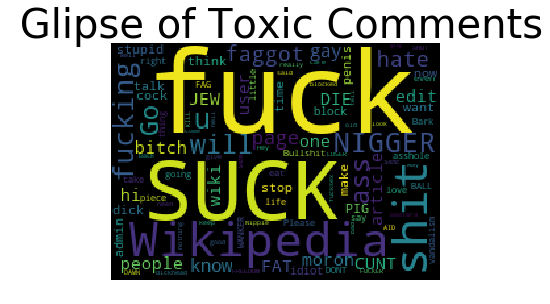

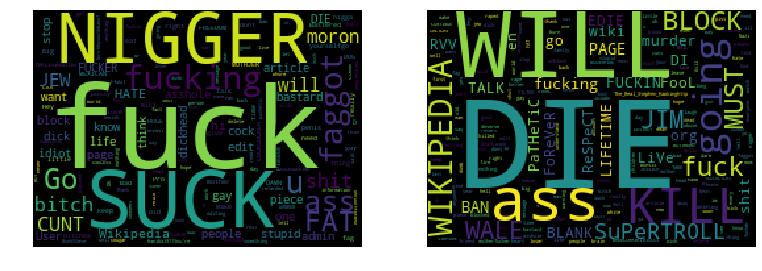

In [14]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(20,20))

#toxic
sub_set = df[df.toxic==1]
text = sub_set.comment_text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=250,
                          height=180
                         ).generate(" ".join(text))

plt.subplot(1, 3, 1)
plt.axis('off')
plt.title(" Glipse of Toxic Comments",fontsize=40)
plt.imshow(cloud_toxic)

plt.figure(figsize=(20,20))

# insult
sub_set = df[df.insult==1]
text = sub_set.comment_text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=250,
                          height=180
                         ).generate(" ".join(text))

plt.subplot(1, 3, 2)
plt.axis('off')
#plt.title("insult",fontsize=40)
plt.imshow(cloud_toxic)

#threat
sub_set = df[df.threat==1]
text = sub_set.comment_text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          collocations=False,
                          width=250,
                          height=180
                         ).generate(" ".join(text))

plt.subplot(1, 3, 3)
plt.axis('off')
#plt.title("threat",fontsize=40)
plt.imshow(cloud_toxic)

# Preparing Dataset(Cleaning  and Pre-processing)

In [15]:
#cleaning of dataset
def remove_whitespace(text):
    return  " ".join(text.split())

df['comment_text']=df['comment_text'].apply(remove_whitespace)
print(df['comment_text'])



0         Explanation Why the edits made under my userna...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         " More I can't make any real suggestions on im...
4         You, sir, are my hero. Any chance you remember...
5         " Congratulations from me as well, use the too...
6              COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
7         Your vandalism to the Matt Shirvington article...
8         Sorry if the word 'nonsense' was offensive to ...
9         alignment on this subject and which are contra...
10        " Fair use rationale for Image:Wonju.jpg Thank...
11        bbq be a man and lets discuss it-maybe over th...
12        Hey... what is it.. @ | talk . What is it... a...
13        Before you start throwing accusations and warn...
14        Oh, and the girl above started her arguments w...
15        " Juelz Santanas Age In 2002, Juelz Santana wa...
16        Bye! Don't look, come or think

In [16]:
#converting the comment_text in lower case

df['comment_text']=df['comment_text'].str.lower()
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text length
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,""" more i can't make any real suggestions on im...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,67


In [17]:
#list of stopwords
from nltk.corpus import stopwords
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [20]:
#pre-processing of dataset
#tokenisation
from nltk import word_tokenize
print(df['comment_text'])
df['comment_text']=df['comment_text'].apply(lambda X: word_tokenize(X))
#df.head()

0         [explanation, why, the, edits, made, under, my...
1         [d'aww, !, he, matches, this, background, colo...
2         [hey, man, ,, i, 'm, really, not, trying, to, ...
3         [``, more, i, ca, n't, make, any, real, sugges...
4         [you, ,, sir, ,, are, my, hero, ., any, chance...
5         [``, congratulations, from, me, as, well, ,, u...
6         [cocksucker, before, you, piss, around, on, my...
7         [your, vandalism, to, the, matt, shirvington, ...
8         [sorry, if, the, word, 'nonsense, ', was, offe...
9         [alignment, on, this, subject, and, which, are...
10        [``, fair, use, rationale, for, image, :, wonj...
11        [bbq, be, a, man, and, lets, discuss, it-maybe...
12        [hey, ..., what, is, it.., @, |, talk, ., what...
13        [before, you, start, throwing, accusations, an...
14        [oh, ,, and, the, girl, above, started, her, a...
15        [``, juelz, santanas, age, in, 2002, ,, juelz,...
16        [bye, !, do, n't, look, ,, com

TypeError: expected string or bytes-like object

In [21]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text length
0,0000997932d777bf,"[explanation, why, the, edits, made, under, my...",0,0,0,0,0,0,264
1,000103f0d9cfb60f,"[d'aww, !, he, matches, this, background, colo...",0,0,0,0,0,0,112
2,000113f07ec002fd,"[hey, man, ,, i, 'm, really, not, trying, to, ...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"[``, more, i, ca, n't, make, any, real, sugges...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"[you, ,, sir, ,, are, my, hero, ., any, chance...",0,0,0,0,0,0,67


In [22]:
#removing stopwords
en_stopwords = stopwords.words('english')

def remove_stopwords(text):
    result = []
    for token in text:
        if token not in en_stopwords:
            result.append(token)
            
    return result

In [27]:
df['comment_text'] = df['comment_text'].apply(remove_stopwords)
#df.head()

In [28]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,text length
0,0000997932d777bf,"[explanation, edits, made, username, hardcore,...",0,0,0,0,0,0,264
1,000103f0d9cfb60f,"[d'aww, !, matches, background, colour, 'm, se...",0,0,0,0,0,0,112
2,000113f07ec002fd,"[hey, man, ,, 'm, really, trying, edit, war, ....",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"[``, ca, n't, make, real, suggestions, improve...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"[,, sir, ,, hero, ., chance, remember, page, '...",0,0,0,0,0,0,67


In [31]:
df['comment_text']

0         [explanation, edits, made, username, hardcore,...
1         [d'aww, !, matches, background, colour, 'm, se...
2         [hey, man, ,, 'm, really, trying, edit, war, ....
3         [``, ca, n't, make, real, suggestions, improve...
4         [,, sir, ,, hero, ., chance, remember, page, '...
5         [``, congratulations, well, ,, use, tools, wel...
6                          [cocksucker, piss, around, work]
7         [vandalism, matt, shirvington, article, revert...
8         [sorry, word, 'nonsense, ', offensive, ., anyw...
9                 [alignment, subject, contrary, dulithgow]
10        [``, fair, use, rationale, image, :, wonju.jpg...
11            [bbq, man, lets, discuss, it-maybe, phone, ?]
12        [hey, ..., it.., @, |, talk, ., ..., exclusive...
13        [start, throwing, accusations, warnings, ,, le...
14        [oh, ,, girl, started, arguments, ., stuck, no...
15        [``, juelz, santanas, age, 2002, ,, juelz, san...
16        [bye, !, n't, look, ,, come, t

In [23]:
#performing lemmatization
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize,pos_tag

def lemmatization(text):
    
    result=[]
    wordnet = WordNetLemmatizer()
    for token,tag in pos_tag(text):
        pos=tag[0].lower()
        
        if pos not in ['a', 'r', 'n', 'v']:
            pos='n'
            
        result.append(wordnet.lemmatize(token,pos))
    
    return result


In [ ]:
df['comment_text']=df['comment_text'].apply(lemmatization)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix


In [29]:
tfidf_vec = TfidfVectorizer(max_df=0.7,stop_words='english',lowercase=False)

In [30]:
print(tfidf_vec)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=False, max_df=0.7, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)


In [34]:
df=pd.read_csv(r'C:\Users\nishtha\Desktop\comments.csv')

# logistic regression applied on each category level separately and probability is predicted.

In [35]:
X = df['comment_text']
y = df['toxic']
print(" Toxic Comments analysis")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_vec = tfidf_vec.fit_transform(X_train)
X_test_vec = tfidf_vec.transform(X_test)

log_toxic = LogisticRegression()
log_toxic.fit(X_train_vec,y_train)

predictions = log_toxic.predict(X_test_vec)
print("confusion Matrix")
print(confusion_matrix(y_test,predictions))
print("Classification Report")
print(classification_report(y_test,predictions))
prob_stoxic = log_toxic.predict_proba(X_test_vec)

 Toxic Comments analysis


C:\Users\nishtha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


confusion Matrix
[[43017   273]
 [ 1991  2591]]
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     43290
           1       0.90      0.57      0.70      4582

   micro avg       0.95      0.95      0.95     47872
   macro avg       0.93      0.78      0.84     47872
weighted avg       0.95      0.95      0.95     47872



In [36]:
X = df['comment_text']
y = df['severe_toxic']
print(" Severe_Toxic Comments analysis")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_vec = tfidf_vec.fit_transform(X_train)
X_test_vec = tfidf_vec.transform(X_test)

log_severe_toxic = LogisticRegression()
log_severe_toxic.fit(X_train_vec,y_train)

predictions = log_toxic.predict(X_test_vec)
print("confusion Matrix")
print(confusion_matrix(y_test,predictions))
print("Classification Report")
print(classification_report(y_test,predictions))
prob_severe_toxic = log_severe_toxic.predict_proba(X_test_vec)

 Severe_Toxic Comments analysis
confusion Matrix
[[44973  2413]
 [   35   451]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     47386
           1       0.16      0.93      0.27       486

   micro avg       0.95      0.95      0.95     47872
   macro avg       0.58      0.94      0.62     47872
weighted avg       0.99      0.95      0.97     47872



In [37]:
X = df['comment_text']
y = df['obscene']
print(" obscene comments analysis")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_vec = tfidf_vec.fit_transform(X_train)
X_test_vec = tfidf_vec.transform(X_test)

log_obscene_toxic = LogisticRegression()
log_obscene_toxic.fit(X_train_vec,y_train)

predictions = log_toxic.predict(X_test_vec)
print("confusion Matrix")
print(confusion_matrix(y_test,predictions))
print("Classification Report")
print(classification_report(y_test,predictions))
prob_obscene_toxic = log_obscene_toxic.predict_proba(X_test_vec)
    

 obscene comments analysis
confusion Matrix
[[44407   909]
 [  601  1955]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     45316
           1       0.68      0.76      0.72      2556

   micro avg       0.97      0.97      0.97     47872
   macro avg       0.83      0.87      0.85     47872
weighted avg       0.97      0.97      0.97     47872



In [38]:
X = df['comment_text']
y = df['threat']
print(" threat comments analysis")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_vec = tfidf_vec.fit_transform(X_train)
X_test_vec = tfidf_vec.transform(X_test)

log_threat_toxic = LogisticRegression()
log_threat_toxic.fit(X_train_vec,y_train)

predictions = log_toxic.predict(X_test_vec)
print("confusion Matrix")
print(confusion_matrix(y_test,predictions))
print("Classification Report")
print(classification_report(y_test,predictions))
prob_threat_toxic = log_threat_toxic.predict_proba(X_test_vec)

 threat comments analysis
confusion Matrix
[[44965  2771]
 [   43    93]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     47736
           1       0.03      0.68      0.06       136

   micro avg       0.94      0.94      0.94     47872
   macro avg       0.52      0.81      0.52     47872
weighted avg       1.00      0.94      0.97     47872



In [39]:
X = df['comment_text']
y = df['insult']
print(" insult comments analysis")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_vec = tfidf_vec.fit_transform(X_train)
X_test_vec = tfidf_vec.transform(X_test)

log_insult_toxic = LogisticRegression()
log_insult_toxic.fit(X_train_vec,y_train)

predictions = log_toxic.predict(X_test_vec)
print("confusion Matrix")
print(confusion_matrix(y_test,predictions))
print("Classification Report")
print(classification_report(y_test,predictions))
prob_insult_toxic = log_insult_toxic.predict_proba(X_test_vec)

 insult comments analysis
confusion Matrix
[[44403  1080]
 [  605  1784]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.98      0.98     45483
           1       0.62      0.75      0.68      2389

   micro avg       0.96      0.96      0.96     47872
   macro avg       0.80      0.86      0.83     47872
weighted avg       0.97      0.96      0.97     47872



In [40]:
X = df['comment_text']
y = df['identity_hate']
print(" insult comments analysis")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_vec = tfidf_vec.fit_transform(X_train)
X_test_vec = tfidf_vec.transform(X_test)

log_identity_hate_toxic = LogisticRegression()
log_identity_hate_toxic.fit(X_train_vec,y_train)

predictions = log_toxic.predict(X_test_vec)
print("confusion Matrix")
print(confusion_matrix(y_test,predictions))
print("Classification Report")
print(classification_report(y_test,predictions))
prob_identity_hate_toxic = log_identity_hate_toxic.predict_proba(X_test_vec)

 insult comments analysis
confusion Matrix
[[44896  2544]
 [  112   320]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     47440
           1       0.11      0.74      0.19       432

   micro avg       0.94      0.94      0.94     47872
   macro avg       0.55      0.84      0.58     47872
weighted avg       0.99      0.94      0.96     47872



In [41]:
#storing the predicted probability in  a dataframe
d1 = pd.DataFrame(prob_stoxic[:,1],columns={'toxic'})
d2 = pd.DataFrame(prob_severe_toxic[:,1],columns={'severe_toxic'})
d3 = pd.DataFrame(prob_obscene_toxic[:,1],columns={'obscene'})
d4 = pd.DataFrame(prob_threat_toxic[:,1],columns={'threat'})
d5 = pd.DataFrame(prob_insult_toxic[:,1],columns={'insult'})
d6 = pd.DataFrame(prob_identity_hate_toxic[:,1],columns={'identity_hate'})

In [ ]:
predicted_final_dataset = pd.concat([df['comment_text'],d1,d2,d3,d4,d5,d6],axis=1)

In [43]:
predicted_final_dataset.head(10)


,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0.088373,0.007063,0.023283,0.003074,0.029817,0.009616
1,D'aww! He matches this background colour I'm s...,0.008632,0.001559,0.002995,0.001306,0.003847,0.002095
2,"Hey man, I'm really not trying to edit war. It...",0.071349,0.005021,0.026065,0.002661,0.033961,0.010242
3,"""\nMore\nI can't make any real suggestions on ...",0.004760,0.002288,0.005594,0.001322,0.004053,0.002538
4,"You, sir, are my hero. Any chance you remember...",0.012201,0.003154,0.008148,0.001610,0.007353,0.003727
5,"""\n\nCongratulations from me as well, use the ...",0.024965,0.004585,0.013665,0.001967,0.012385,0.004713
6,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,0.046447,0.006245,0.026039,0.002633,0.020367,0.005420
7,Your vandalism to the Matt Shirvington article...,0.052260,0.004195,0.014828,0.003070,0.016510,0.006480
8,Sorry if the word 'nonsense' was offensive to ...,0.001204,0.001276,0.002414,0.000898,0.001597,0.001563
9,alignment on this subject and which are contra...,0.021691,0.003351,0.013807,0.002163,0.014890,0.004702


In [44]:
predicted_final_dataset.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,47872.000000,47872.000000,47872.000000,47872.000000,47872.000000,47872.000000
mean,0.095802,0.010045,0.052632,0.003086,0.049382,0.008660
std,0.202028,0.051108,0.158272,0.015133,0.141452,0.033457
min,0.000031,0.000053,0.000082,0.000128,0.000047,0.000072
25%,0.011352,0.002015,0.007128,0.001369,0.006279,0.002505
50%,0.027117,0.003355,0.013888,0.001905,0.013236,0.004232
75%,0.064375,0.005211,0.026178,0.002596,0.026952,0.006754
max,1.000000,0.995960,1.000000,0.960454,0.999998,0.994973
